# Análise Exploratória de Dados (EDA) - Ocorrências Aeronáuticas

## Notebook 02 - Fase de Análise

**Objetivo:** Explorar o conjunto de dados unificado (`cenipa_master.csv`) para extrair insights visuais e estatísticos sobre as causas e características das ocorrências aeronáuticas no Brasil.

### 0. Instalação e Carregamento

Inicialmente, vamos instalar as bibliotecas e carregar nosso `DataFrame` mestre, inspecionando-o para garantir que os dados foram carregados corretamente.

In [ ]:
# Instalação das bibliotecas
!pip install -q pandas matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Bibliotecas importadas e ambiente configurado.


In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

print("Bibliotecas importadas e ambiente configurado.")

Bibliotecas importadas e ambiente configurado.


In [2]:
# Carregando o DataFrame mestre que preparamos
df = pd.read_csv('data/cenipa_master.csv', sep=';', encoding='utf-8')

print("DataFrame 'cenipa_master.csv' carregado com sucesso!")

# Inspeção inicial para garantir que tudo está correto
print("\nInformações do DataFrame:")
df.info()

print("\nVisualizando as 5 primeiras linhas:")
display(df.head())

DataFrame 'cenipa_master.csv' carregado com sucesso!

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14020 entries, 0 to 14019
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   codigo_ocorrencia               14020 non-null  int64  
 1   ocorrencia_classificacao        14020 non-null  object 
 2   ocorrencia_latitude             11236 non-null  object 
 3   ocorrencia_longitude            11236 non-null  object 
 4   ocorrencia_cidade               14020 non-null  object 
 5   ocorrencia_uf                   14020 non-null  object 
 6   ocorrencia_pais                 14020 non-null  object 
 7   ocorrencia_aerodromo            14020 non-null  object 
 8   ocorrencia_dia                  14020 non-null  object 
 9   ocorrencia_hora                 14018 non-null  object 
 10  investigacao_aeronave_liberada  14020 non-null  object 
 11  investigacao_

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,BRASIL,FAER,11/05/2025,04:20:00,SIM,FINALIZADA,NÃO,0,1,NÃO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,AVIÃO,EMBRAER,ERJ 190-400,NaN,NaN,61200.0,61200.0,0.0,2024.0,BRASIL,AVIÃO,NAO INFORMADO,VIRACOPOS,ORLANDO BEZERRA DE MENEZES,DESCIDA,REGULAR,NENHUM,0.0
1,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,BRASIL,SBUL,08/05/2025,14:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,AVIÃO,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-72-212A (600),NaN,NaN,23000.0,23000.0,NaN,2024.0,BRASIL,AVIÃO,NAO INFORMADO,TENENTE-CORONEL AVIADOR CÉSAR BOMBONATO,TANCREDO NEVES,SUBIDA,REGULAR,NENHUM,0.0
2,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,BRASIL,SBGR,09/05/2025,18:45:00,SIM,FINALIZADA,NÃO,0,1,NÃO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,NaN,AIRBUS S.A.S.,A320-271N,NaN,BIMOTOR,79000.0,79000.0,NaN,NaN,BRASIL,NaN,NAO INFORMADO,GOVERNADOR ANDRÉ FRANCO MONTORO,PINTO MARTINS,DECOLAGEM,REGULAR,NENHUM,0.0
3,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,BRASIL,SBSM,04/05/2025,14:45:00,SIM,FINALIZADA,NÃO,0,1,NÃO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,AVIÃO,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-72-212A (600),TURBOÉLICE,BIMOTOR,22000.0,22000.0,0.0,2016.0,BRASIL,AVIÃO,NAO INFORMADO,SANTA MARIA,VIRACOPOS,DECOLAGEM,REGULAR,NENHUM,0.0
4,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,BRASIL,SBSR,10/05/2025,10:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,AVIÃO,AIRBUS,A320-214,JATO,BIMOTOR,77000.0,77000.0,184.0,2007.0,BRASIL,AVIÃO,NAO INFORMADO,PROFESSOR ERIBERTO MANOEL REINO,GOVERNADOR ANDRÉ FRANCO MONTORO,DECOLAGEM,REGULAR,LEVE,0.0


## 1. Análise Univariada

Nesta seção, vamos analisar as variáveis individualmente para entender suas distribuições.

### 1.1. Distribuição da Classificação das Ocorrências

Começamos analisando a coluna `ocorrencia_classificacao` para entender a proporção de incidentes, incidentes graves e acidentes em nosso conjunto de dados.

Contagem de ocorrências por classificação:
ocorrencia_classificacao
INCIDENTE          9344
ACIDENTE           3238
INCIDENTE GRAVE    1438
Name: count, dtype: int64


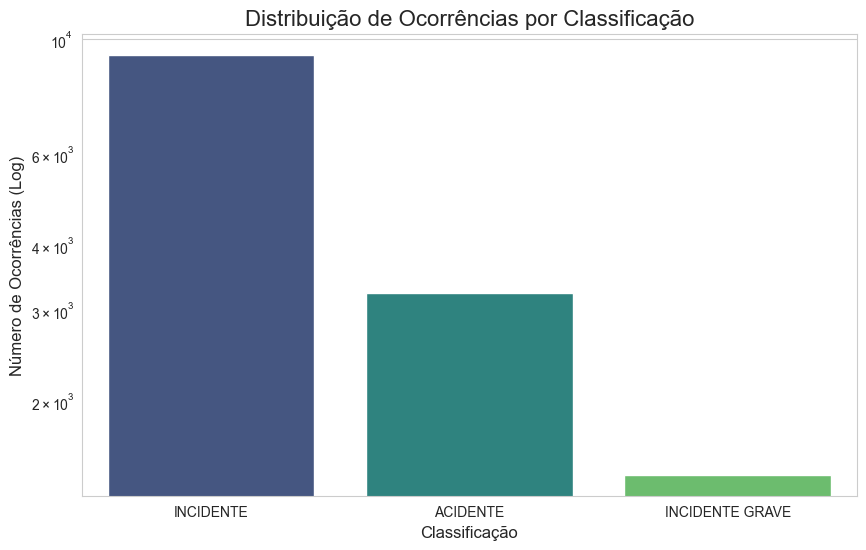

In [3]:
# Contando os valores na coluna de classificação
classificacao_counts = df['ocorrencia_classificacao'].value_counts()

print("Contagem de ocorrências por classificação:")
print(classificacao_counts)

# Criando a visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=classificacao_counts.index, y=classificacao_counts.values, palette='viridis', hue=classificacao_counts.index)
plt.title('Distribuição de Ocorrências por Classificação', fontsize=16)
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Número de Ocorrências (Log)', fontsize=12)
plt.yscale('log') # Usando escala de log para melhor visualização das categorias menores
plt.show()

### 1.2. Análise Temporal das Ocorrências

Vamos analisar a evolução do número de ocorrências ao longo do tempo. Isso pode revelar tendências importantes, sazonalidades ou o impacto de eventos externos na segurança da aviação.

Para isso, primeiro precisamos garantir que nossa coluna de data seja tratada como tal, e não como texto.

Contagem de ocorrências por ano:
ano_ocorrencia
2007.0     233
2008.0     193
2009.0     198
2010.0     233
2011.0     233
2012.0     257
2013.0     262
2014.0     251
2015.0     207
2016.0     183
2017.0     212
2018.0     177
2019.0     207
2020.0     210
2021.0     262
2022.0     262
2023.0     565
2024.0    1199
2025.0     302
Name: count, dtype: int64


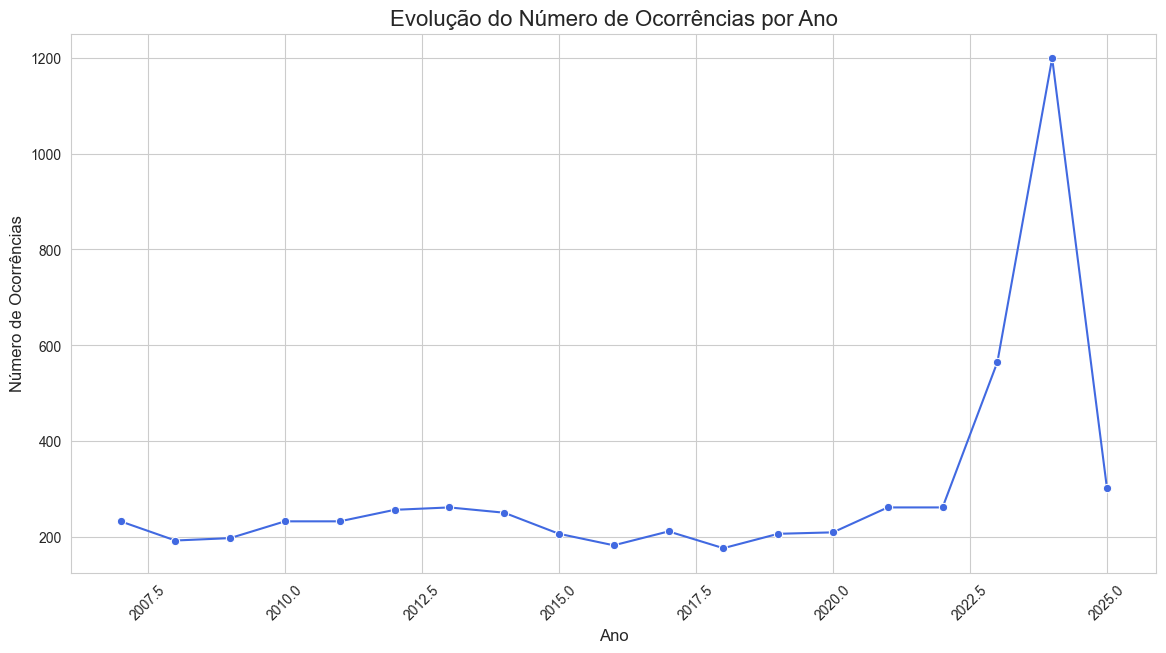

In [4]:
# 1. Convertendo a coluna 'ocorrencia_dia' para datetime
# Usamos errors='coerce' para transformar qualquer data inválida em Nulo (NaT)
df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], errors='coerce')

# 2. Extraindo o ano da ocorrência para uma nova coluna
df['ano_ocorrencia'] = df['ocorrencia_dia'].dt.year

# 3. Contando as ocorrências por ano
ocorrencias_por_ano = df['ano_ocorrencia'].value_counts().sort_index()

print("Contagem de ocorrências por ano:")
print(ocorrencias_por_ano)

# 4. Criando a visualização
plt.figure(figsize=(14, 7))
sns.lineplot(x=ocorrencias_por_ano.index, y=ocorrencias_por_ano.values, marker='o', color='royalblue')
plt.title('Evolução do Número de Ocorrências por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 1.3. Composição das Ocorrências ao Longo do Tempo

A análise temporal revelou um pico significativo de ocorrências em 2024. A próxima pergunta natural é: o que compõe esse pico? Foi um aumento em todos os tipos de ocorrência (acidentes, incidentes, etc.) ou um tipo específico que cresceu desproporcionalmente?

Para investigar, vamos visualizar a evolução de cada classificação de ocorrência ano a ano.

Contagem de ocorrências por ano e classificação:


ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
ano_ocorrencia,,,
2007.0,40,185,8
2008.0,60,116,17
2009.0,41,140,17
2010.0,53,144,36
2011.0,76,137,20
2012.0,90,127,40
2013.0,88,149,25
2014.0,76,136,39
2015.0,76,105,26


<Figure size 1400x800 with 0 Axes>

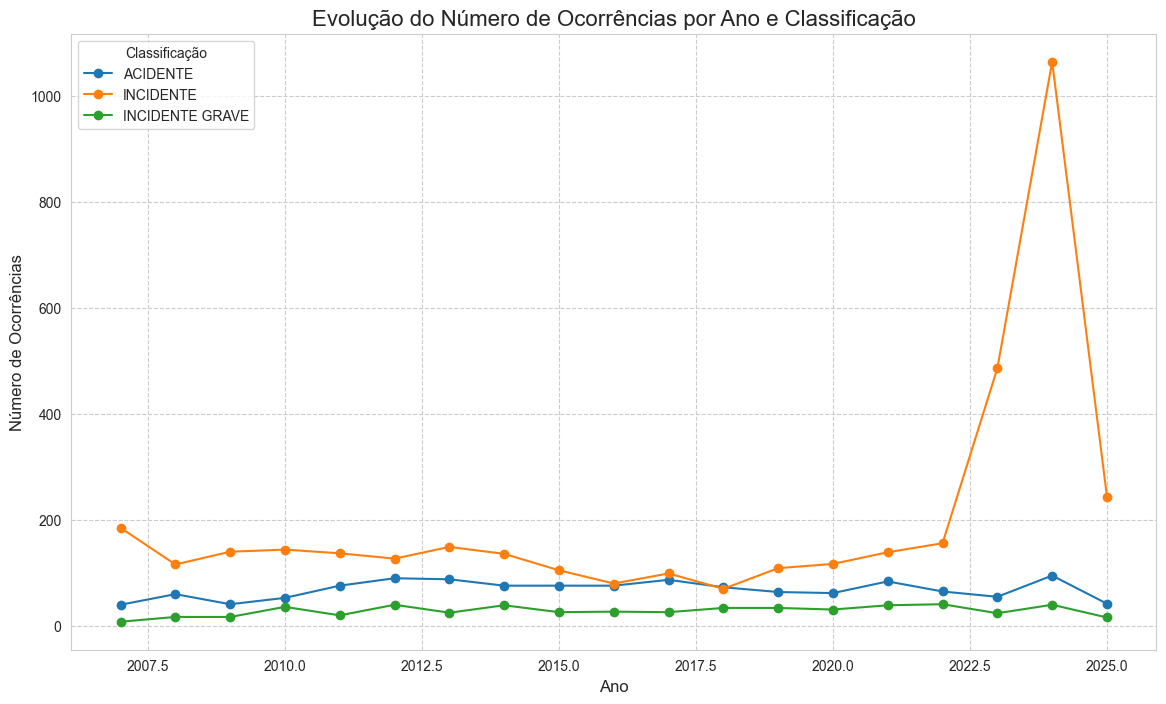

<Figure size 1400x800 with 0 Axes>

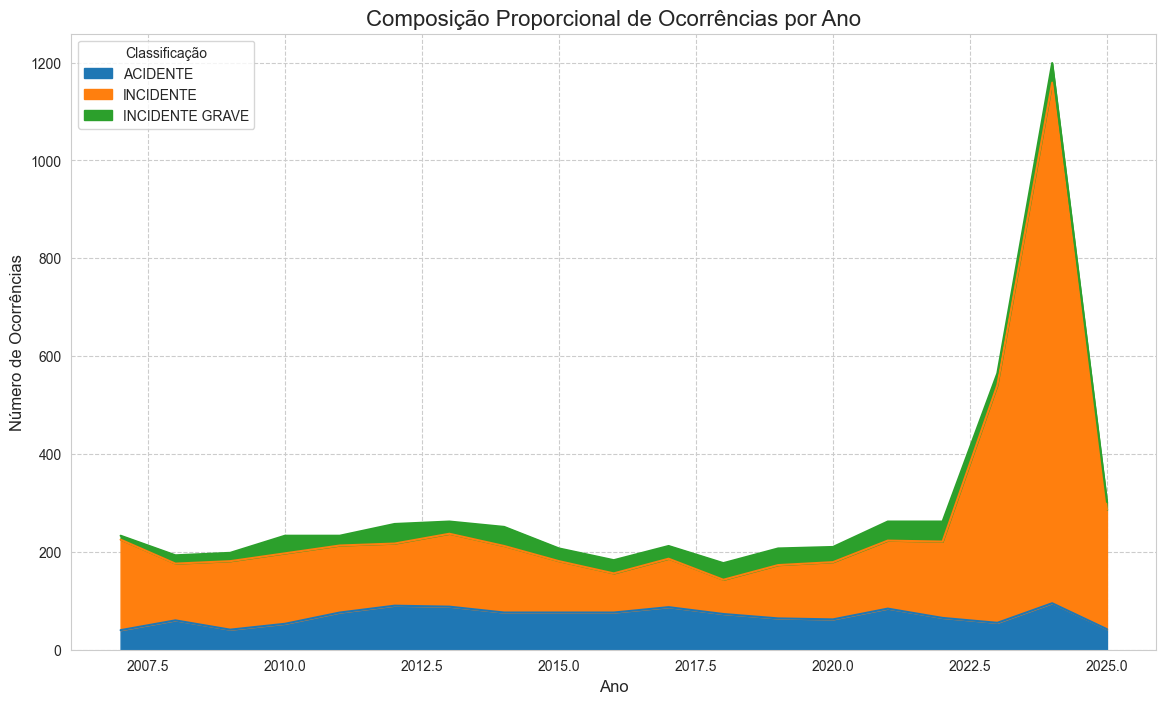

In [5]:
# 1. Agrupando os dados por ano e por classificação para obter a contagem
composicao_anual = df.groupby(['ano_ocorrencia', 'ocorrencia_classificacao']).size().unstack(fill_value=0)

print("Contagem de ocorrências por ano e classificação:")
display(composicao_anual)


# 2. Criando a visualização
plt.figure(figsize=(14, 8))
composicao_anual.plot(kind='line', marker='o', figsize=(14, 8))

plt.title('Evolução do Número de Ocorrências por Ano e Classificação', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.legend(title='Classificação')
plt.grid(True, which='both', linestyle='--')
plt.show()

# 3. Gráfico de área empilhada para ver a proporção
plt.figure(figsize=(14, 8))
composicao_anual.plot(kind='area', stacked=True, figsize=(14, 8))

plt.title('Composição Proporcional de Ocorrências por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.legend(title='Classificação')
plt.grid(True, which='both', linestyle='--')
plt.show()

### 1.4. Investigação do Pico de Ocorrências em 2024

A análise temporal revelou um aumento abrupto e significativo no número de ocorrências em 2024, concentrado quase exclusivamente na categoria `INCIDENTE`. Uma pesquisa de contexto foi realizada para entender este fenômeno.

**Conclusão da Investigação:**

O aumento está fortemente correlacionado com mudanças regulatórias e de infraestrutura de reporte, e não necessariamente com uma degradação da segurança aérea. Os principais fatores são:

1.  **Nova Regulamentação (Resolução nº 714 da ANAC):** Aprovada em abril de 2023, expandiu a obrigatoriedade de reportes de segurança operacional.
2.  **Portal Único de Notificação do CENIPA:** A implementação final deste portal, especialmente a fase de 1º de junho de 2024 que incluiu "demais organizações e profissionais", tornou o processo de notificação mais fácil e mandatório para um público muito maior.

Portanto, o pico de **incidentes** em 2024 é interpretado como um reflexo positivo de uma maior adesão à cultura de segurança e de melhorias no sistema de notificação, e não como um aumento real na periculosidade das operações aéreas. Esta compreensão é crucial para qualquer análise de tendência futura.

## 2. Análise Geográfica

Nesta seção, vamos analisar a distribuição espacial das ocorrências para identificar estados ou regiões com maior concentração de eventos.

Contagem de ocorrências por UF:
ocorrencia_uf
SP     3468
RJ     1308
MG     1114
PR      982
RS      779
MT      688
GO      677
BA      645
PA      639
AM      500
SC      491
DF      436
PE      421
MS      366
CE      255
MA      186
ES      177
RR      145
TO      136
PI      112
AC      112
RO       95
PB       71
AL       69
RN       50
SE       44
AP       33
***      21
Name: count, dtype: int64


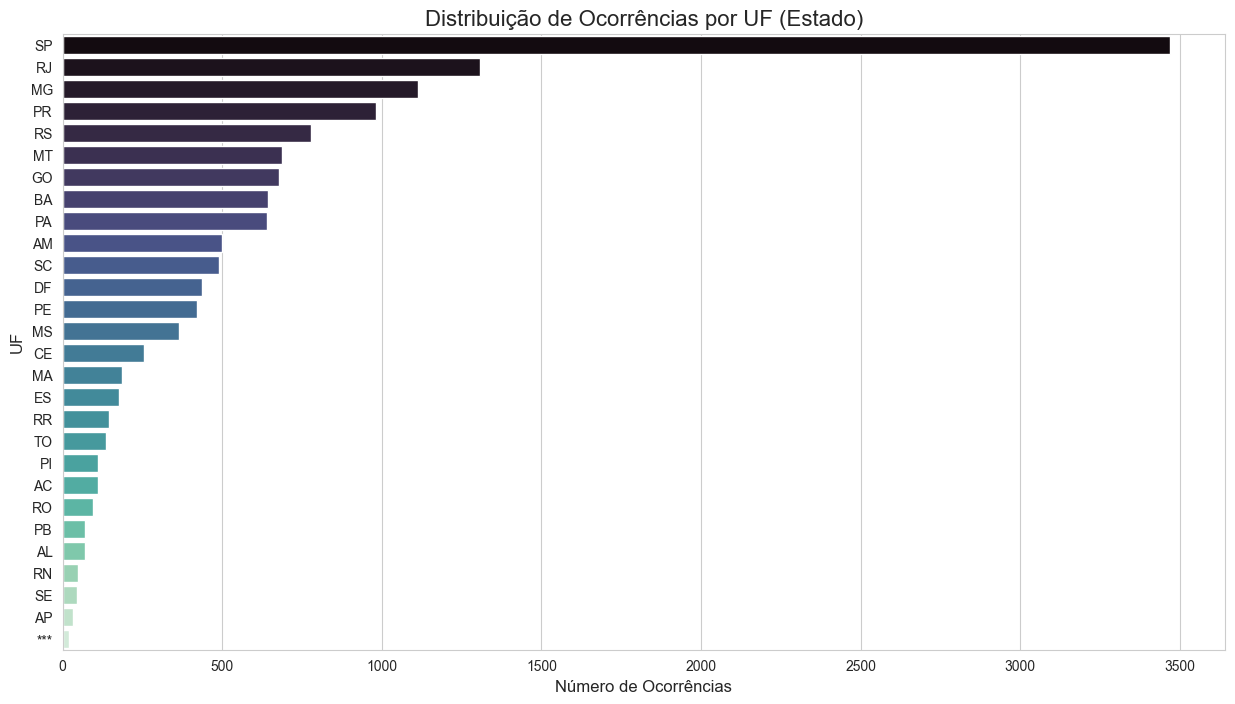

In [6]:
# Contando as ocorrências por UF (Estado)
ocorrencias_por_uf = df['ocorrencia_uf'].value_counts()

print("Contagem de ocorrências por UF:")
# Exibindo os 10 primeiros para ter uma ideia
print(ocorrencias_por_uf.head(28))

# Criando a visualização
plt.figure(figsize=(15, 8))
sns.barplot(y=ocorrencias_por_uf.index, x=ocorrencias_por_uf.values, palette='mako', hue=ocorrencias_por_uf.index, legend=False)
plt.title('Distribuição de Ocorrências por UF (Estado)', fontsize=16)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('UF', fontsize=12)
plt.show()

### 2.1. Análise Proporcional da Classificação por UF

A análise do número absoluto de ocorrências mostrou uma forte concentração em estados com maior tráfego aéreo, como São Paulo. Uma análise mais aprofundada requer a normalização desses dados.

Como um primeiro passo nessa direção, vamos analisar a **composição percentual** das ocorrências (`ACIDENTE`, `INCIDENTE`, `INCIDENTE GRAVE`) dentro de cada estado. Isso nos permitirá comparar se a "gravidade" dos eventos é diferente entre os estados, independentemente do volume total.

Composição Percentual de Ocorrências nos 10 principais estados:


ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
ocorrencia_uf,,,
SP,18.771626,73.615917,7.612457
RJ,8.409786,85.168196,6.422018
MG,21.813285,67.773788,10.412926
PR,23.014257,66.293279,10.692464
RS,35.943517,52.759949,11.296534
MT,53.052326,32.122093,14.825581
GO,32.644018,46.381093,20.974889
BA,20.000000,68.372093,11.627907
PA,35.837246,50.704225,13.458529


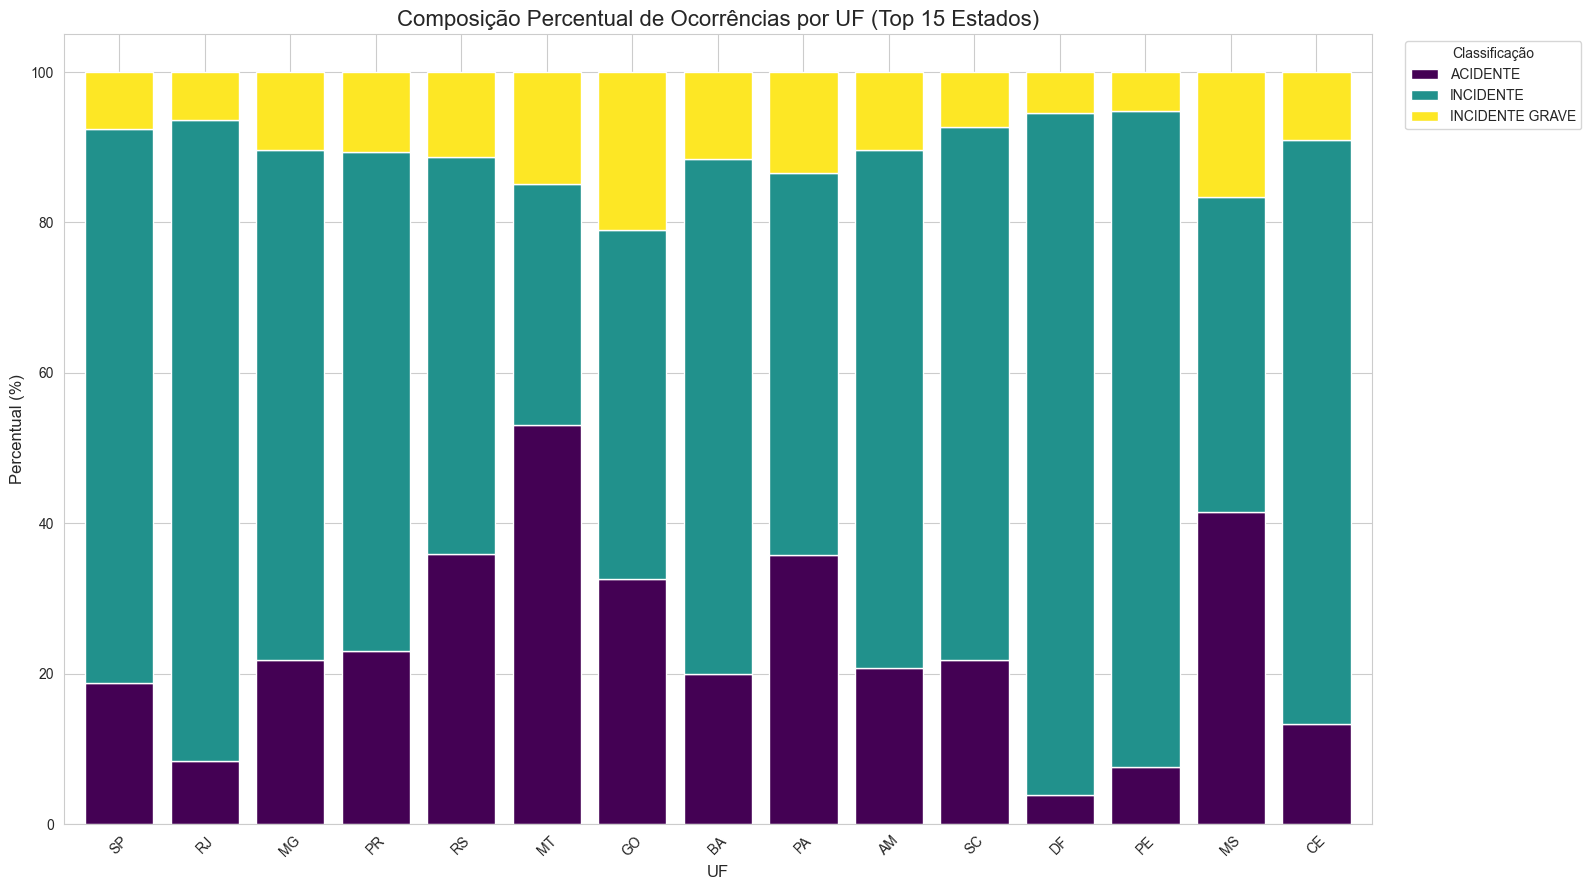

In [7]:
# 1. Agrupando por UF e Classificação
composicao_uf = df.groupby(['ocorrencia_uf', 'ocorrencia_classificacao']).size().unstack(fill_value=0)

# 2. Calculando o total por UF para normalizar
total_por_uf = composicao_uf.sum(axis=1)

# 3. Calculando a proporção (percentual)
composicao_percentual_uf = composicao_uf.div(total_por_uf, axis=0) * 100

print("Composição Percentual de Ocorrências nos 10 principais estados:")
# Ordenando pelo total de ocorrências para visualizar os mais relevantes
display(composicao_percentual_uf.loc[ocorrencias_por_uf.head(10).index])


# 4. Criando a visualização (gráfico de barras 100% empilhado)
# Vamos focar nos 15 estados com mais ocorrências para uma melhor visualização
top_15_uf = ocorrencias_por_uf.head(15).index
composicao_percentual_uf.loc[top_15_uf].plot(
    kind='bar',
    stacked=True,
    figsize=(16, 9),
    colormap='viridis',
    width=0.8
)

plt.title('Composição Percentual de Ocorrências por UF (Top 15 Estados)', fontsize=16)
plt.xlabel('UF', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Classificação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3. Análise por Segmento da Aviação

Nossa análise geográfica levantou a hipótese de que o tipo de operação aérea (comercial, agrícola, particular) influencia diretamente na gravidade das ocorrências.

Nesta seção, vamos investigar a relação entre o `aeronave_registro_segmento` e a `ocorrencia_classificacao` para validar essa hipótese.

Composição Percentual de Ocorrências por Segmento:


ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_registro_segmento,,,
ADMINISTRAÇÃO DIRETA,20.735786,63.545151,15.719064
ADMINISTRAÇÃO INDIRETA,22.727273,59.090909,18.181818
AGRÍCOLA,75.576037,9.370200,15.053763
ESPECIALIZADA,49.777778,36.888889,13.333333
EXPERIMENTAL,64.620355,17.285945,18.093700
HISTÓRICA,50.000000,50.000000,0.000000
INSTRUÇÃO,30.138037,48.926380,20.935583
MÚLTIPLA,42.000000,48.000000,10.000000
NAO INFORMADO,9.652076,86.083053,4.264871


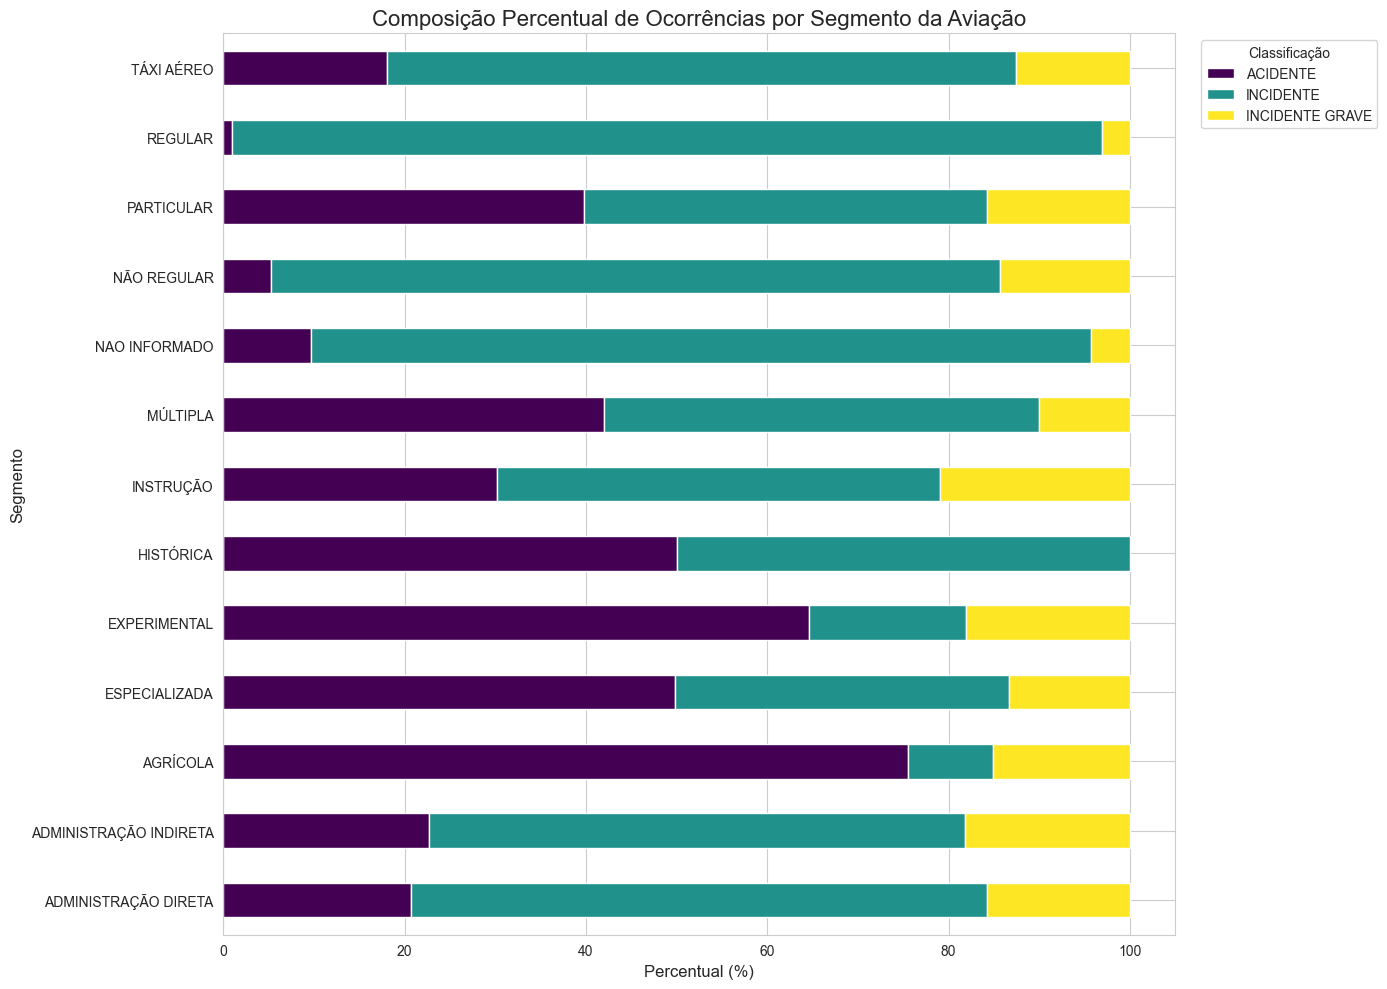

In [8]:
# 1. Agrupando por Segmento e Classificação
composicao_segmento = df.groupby(['aeronave_registro_segmento', 'ocorrencia_classificacao']).size().unstack(fill_value=0)

# 2. Calculando a proporção percentual
composicao_percentual_segmento = composicao_segmento.div(composicao_segmento.sum(axis=1), axis=0) * 100

print("Composição Percentual de Ocorrências por Segmento:")
display(composicao_percentual_segmento)

# 3. Criando a visualização
composicao_percentual_segmento.plot(
    kind='barh', # Gráfico de barras horizontais para melhor leitura
    stacked=True,
    figsize=(14, 10),
    colormap='viridis'
)

plt.title('Composição Percentual de Ocorrências por Segmento da Aviação', fontsize=16)
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Segmento', fontsize=12)
plt.legend(title='Classificação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **4. Análise por Tipo de Veículo e Tipo de Motor**

Sabemos que a gravidade das ocorrências varia entre os segmentos da aviação, mas será que essa gravidade também está associada ao tipo de aeronave ou ao tipo de motor utilizado?

Nesta seção, comparamos a distribuição dos tipos de ocorrência (ACIDENTE, INCIDENTE GRAVE etc.) de acordo com:

* **Tipo de Veículo:** (ex: AVIÃO, HELICÓPTERO, PLANADOR)
* **Tipo de Motor:** (ex: MOTOR A PISTÃO, TURBOÉLICE, JATO)

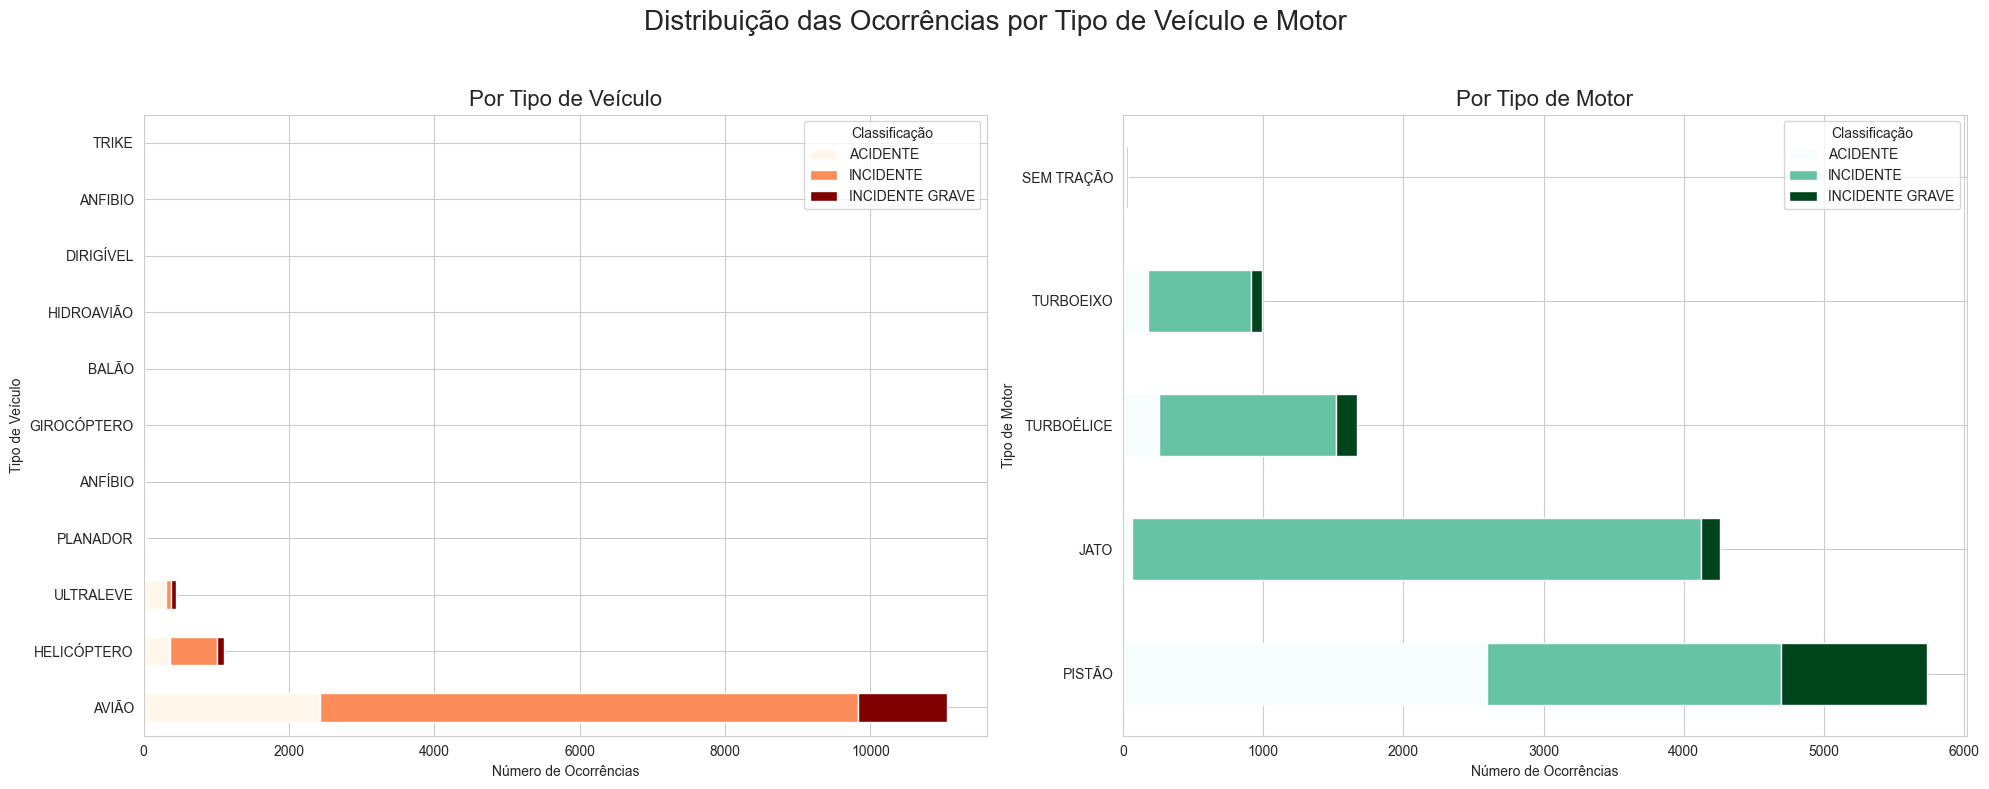

In [9]:
# Garantindo que categorias nulas sejam removidas
df_limpo = df.dropna(subset=['aeronave_tipo_veiculo', 'aeronave_motor_tipo', 'ocorrencia_classificacao'])

# Contagem cruzada entre tipo de veículo e classificação da ocorrência
veiculo_vs_ocorrencia = df_limpo.groupby(['aeronave_tipo_veiculo', 'ocorrencia_classificacao']).size().unstack(fill_value=0)
motor_vs_ocorrencia = df_limpo.groupby(['aeronave_motor_tipo', 'ocorrencia_classificacao']).size().unstack(fill_value=0)

# Ordenando pelo total de ocorrências para facilitar leitura
veiculo_vs_ocorrencia['TOTAL'] = veiculo_vs_ocorrencia.sum(axis=1)
motor_vs_ocorrencia['TOTAL'] = motor_vs_ocorrencia.sum(axis=1)

veiculo_vs_ocorrencia = veiculo_vs_ocorrencia.sort_values(by='TOTAL', ascending=False).drop(columns='TOTAL')
motor_vs_ocorrencia = motor_vs_ocorrencia.sort_values(by='TOTAL', ascending=False).drop(columns='TOTAL')

# Plotagem
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Distribuição das Ocorrências por Tipo de Veículo e Motor', fontsize=20)

# Gráfico 1: Tipo de Veículo
veiculo_vs_ocorrencia.plot(kind='barh', stacked=True, ax=axes[0], colormap='OrRd')
axes[0].set_title('Por Tipo de Veículo', fontsize=16)
axes[0].set_xlabel('Número de Ocorrências')
axes[0].set_ylabel('Tipo de Veículo')
axes[0].legend(title='Classificação')

# Gráfico 2: Tipo de Motor
motor_vs_ocorrencia.plot(kind='barh', stacked=True, ax=axes[1], colormap='BuGn')
axes[1].set_title('Por Tipo de Motor', fontsize=16)
axes[1].set_xlabel('Número de Ocorrências')
axes[1].set_ylabel('Tipo de Motor')
axes[1].legend(title='Classificação')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Resultados Esperados**

* **Tipo de Veículo:** Devemos observar se certos veículos (como HELICÓPTEROS ou AVIÕES AGRÍCOLAS) concentram maior número de **acidentes** em comparação com incidentes.
* **Tipo de Motor:** Pode revelar, por exemplo, que aeronaves com motores a pistão (geralmente mais simples e mais antigos) estão mais associadas a acidentes.

---

####  Possível Interpretação

> **Aeronaves com motores a pistão** e **veículos de menor porte**, como aviões agrícolas, tendem a operar em condições mais adversas ou com menos regulamentação, o que pode explicar maiores taxas de acidente.


### **4.1 Análise Comparativa: Tipo de Veículo e Tipo de Motor em Grupos de Alto vs. Baixo Risco**

Agruparemos os **tipos de veículos** e os **tipos de motores** em dois grupos:

* **Grupo de Alto Risco:** Tipos onde a proporção de ocorrências classificadas como `ACIDENTE` for **maior que 50%**.
* **Grupo de Baixo Risco:** Tipos onde essa proporção for **igual ou menor que 50%**.



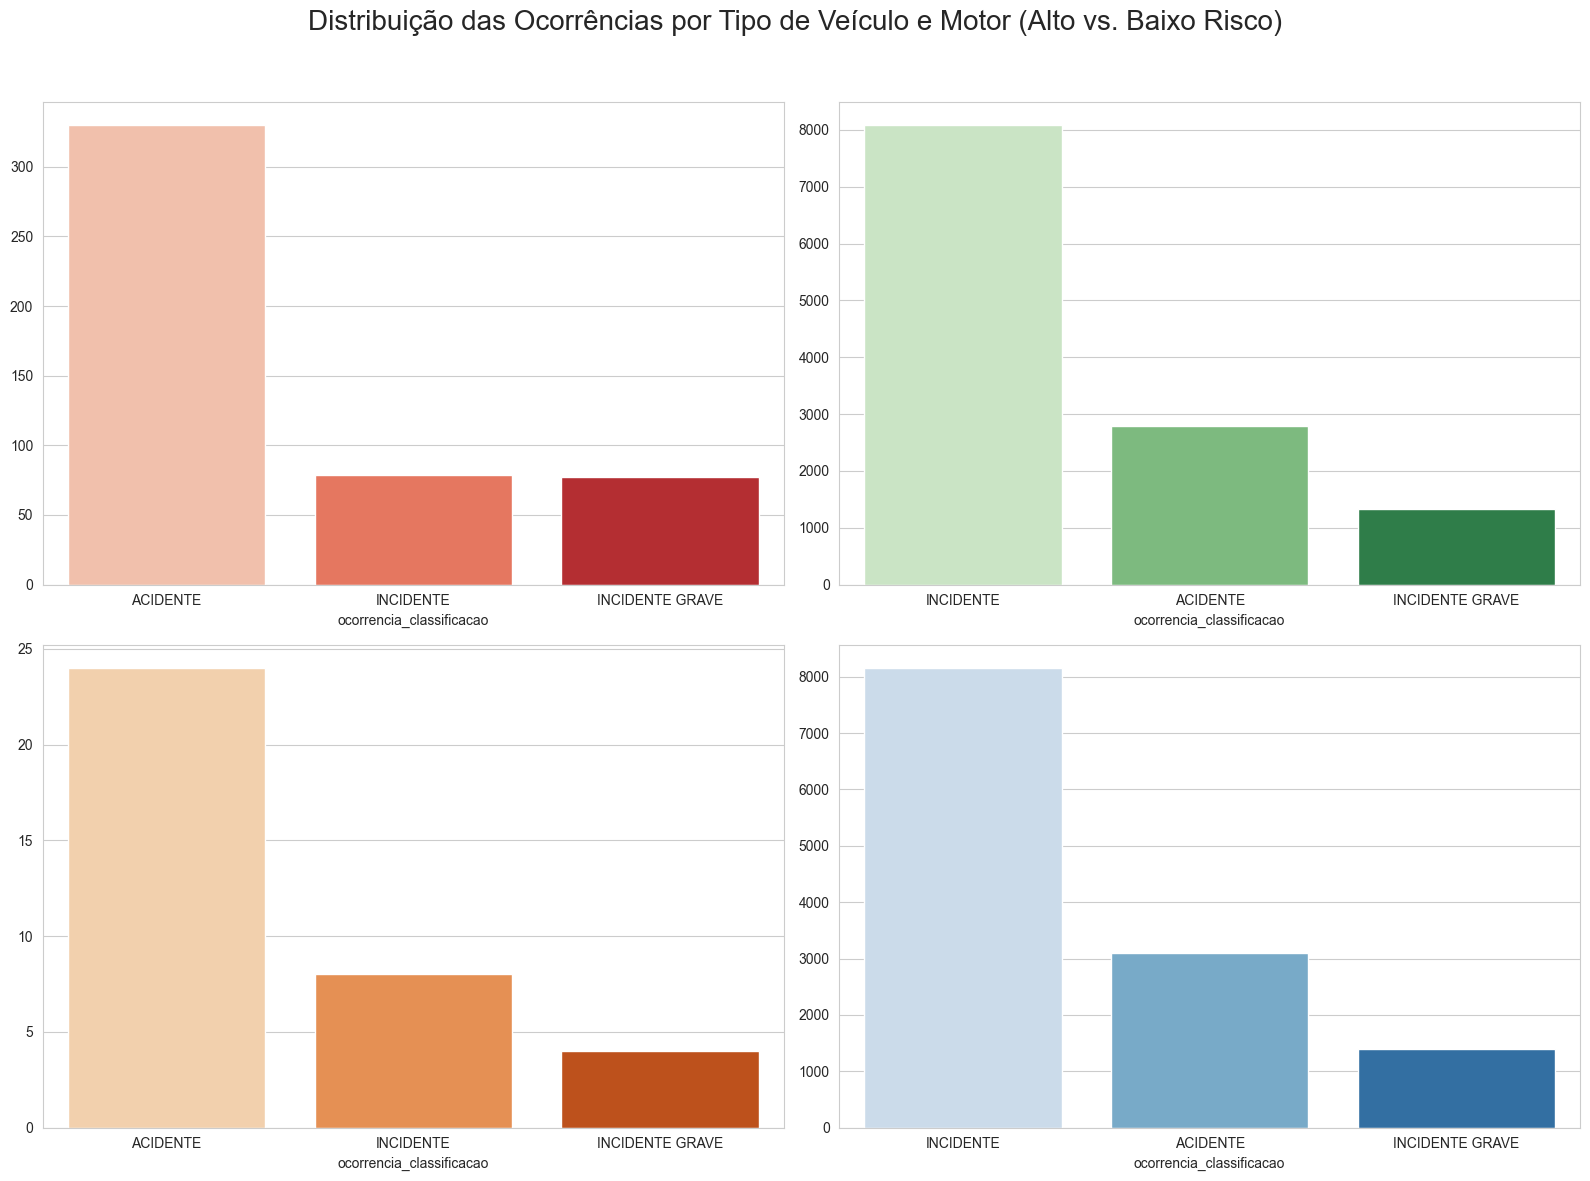

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrar e limpar dados relevantes
df_limpo = df.dropna(subset=['aeronave_tipo_veiculo', 'aeronave_motor_tipo', 'ocorrencia_classificacao'])

# 2. Agrupar por tipo de veículo e tipo de ocorrência
veiculo_ocorrencia = df_limpo.groupby(['aeronave_tipo_veiculo', 'ocorrencia_classificacao']).size().unstack(fill_value=0)
veiculo_ocorrencia['total'] = veiculo_ocorrencia.sum(axis=1)
veiculo_ocorrencia['proporcao_acidente'] = veiculo_ocorrencia['ACIDENTE'] / veiculo_ocorrencia['total']

# 3. Agrupar por tipo de motor e tipo de ocorrência
motor_ocorrencia = df_limpo.groupby(['aeronave_motor_tipo', 'ocorrencia_classificacao']).size().unstack(fill_value=0)
motor_ocorrencia['total'] = motor_ocorrencia.sum(axis=1)
motor_ocorrencia['proporcao_acidente'] = motor_ocorrencia['ACIDENTE'] / motor_ocorrencia['total']

# 4. Identificar alto e baixo risco
veiculos_alto_risco = veiculo_ocorrencia[veiculo_ocorrencia['proporcao_acidente'] > 0.5].index.tolist()
veiculos_baixo_risco = veiculo_ocorrencia[veiculo_ocorrencia['proporcao_acidente'] <= 0.5].index.tolist()

motores_alto_risco = motor_ocorrencia[motor_ocorrencia['proporcao_acidente'] > 0.5].index.tolist()
motores_baixo_risco = motor_ocorrencia[motor_ocorrencia['proporcao_acidente'] <= 0.5].index.tolist()

# 5. Filtrar DataFrames conforme os grupos
df_veiculo_alto = df_limpo[df_limpo['aeronave_tipo_veiculo'].isin(veiculos_alto_risco)]
df_veiculo_baixo = df_limpo[df_limpo['aeronave_tipo_veiculo'].isin(veiculos_baixo_risco)]

df_motor_alto = df_limpo[df_limpo['aeronave_motor_tipo'].isin(motores_alto_risco)]
df_motor_baixo = df_limpo[df_limpo['aeronave_motor_tipo'].isin(motores_baixo_risco)]

# 6. Contar tipos de ocorrência por grupo
ocorrencia_veiculo_alto = df_veiculo_alto['ocorrencia_classificacao'].value_counts()
ocorrencia_veiculo_baixo = df_veiculo_baixo['ocorrencia_classificacao'].value_counts()

ocorrencia_motor_alto = df_motor_alto['ocorrencia_classificacao'].value_counts()
ocorrencia_motor_baixo = df_motor_baixo['ocorrencia_classificacao'].value_counts()

# 7. Visualização
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribuição das Ocorrências por Tipo de Veículo e Motor (Alto vs. Baixo Risco)', fontsize=20)

# Veículo - Alto Risco
sns.barplot(
    ax=axes[0, 0],
    x=ocorrencia_veiculo_alto.index,
    y=ocorrencia_veiculo_alto.values,
    hue=ocorrencia_veiculo_alto.index,
    palette='Reds',
    legend=False
)

# Veículo - Baixo Risco
sns.barplot(
    ax=axes[0, 1],
    x=ocorrencia_veiculo_baixo.index,
    y=ocorrencia_veiculo_baixo.values,
    hue=ocorrencia_veiculo_baixo.index,
    palette='Greens',
    legend=False
)

# Motor - Alto Risco
sns.barplot(
    ax=axes[1, 0],
    x=ocorrencia_motor_alto.index,
    y=ocorrencia_motor_alto.values,
    hue=ocorrencia_motor_alto.index,
    palette='Oranges',
    legend=False
)

# Motor - Baixo Risco
sns.barplot(
    ax=axes[1, 1],
    x=ocorrencia_motor_baixo.index,
    y=ocorrencia_motor_baixo.values,
    hue=ocorrencia_motor_baixo.index,
    palette='Blues',
    legend=False
)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 5. Análise por Fase da Operação

Uma das análises mais clássicas e importantes na segurança de voo é identificar em qual fase da operação (pouso, decolagem, cruzeiro, etc.) as ocorrências são mais comuns. Esta análise nos ajuda a entender onde os riscos se concentram durante um voo típico.

Contagem de ocorrências por Fase de Operação (Top 15):
aeronave_fase_operacao
POUSO                  2755
DECOLAGEM              2406
CRUZEIRO               2117
CORRIDA APÓS POUSO     1146
SUBIDA                  944
APROXIMAÇÃO FINAL       903
TÁXI                    880
MANOBRA                 442
DESCIDA                 367
INDETERMINADA           298
ESTACIONAMENTO          285
REVISÃO DE PISTA        265
OUTRA FASE              202
CIRCUITO DE TRÁFEGO     190
ESPECIALIZADA           190
Name: count, dtype: int64


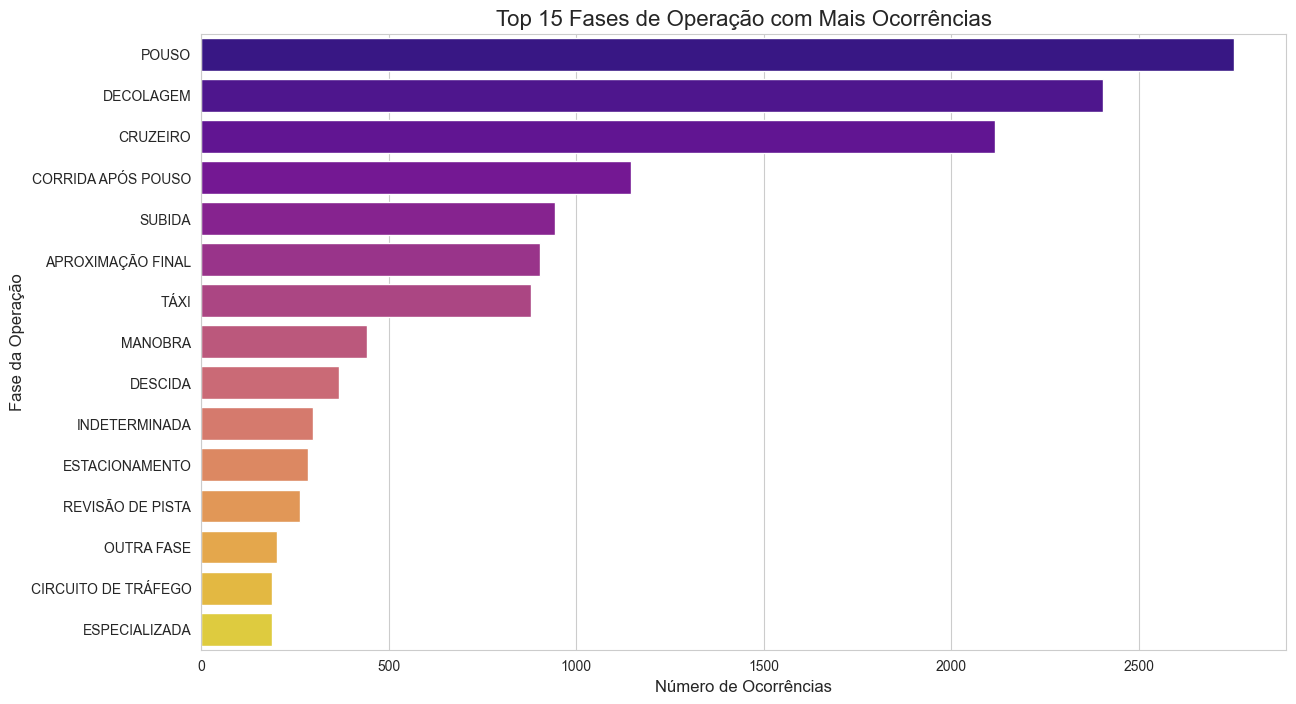

In [13]:
# Contando as ocorrências por fase de operação
fase_operacao_counts = df['aeronave_fase_operacao'].value_counts().nlargest(15)

print("Contagem de ocorrências por Fase de Operação (Top 15):")
print(fase_operacao_counts)

# Criando a visualização
plt.figure(figsize=(14, 8))
sns.barplot(y=fase_operacao_counts.index, x=fase_operacao_counts.values, palette='plasma', hue=fase_operacao_counts.index, legend=False)
plt.title('Top 15 Fases de Operação com Mais Ocorrências', fontsize=16)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Fase da Operação', fontsize=12)
plt.show()

## 6. Conclusão da Análise Exploratória (EDA) e Direcionamento para a Modelagem

Ao final desta fase de exploração, construímos um entendimento profundo sobre o ecossistema das ocorrências aeronáuticas no Brasil. Através de uma análise minuciosa, obtivemos insights valiosos que nos ajudam a compreender as tendências temporais, os riscos regionais, os fatores críticos por segmento e as fases mais perigosas do voo.

Entre os principais achados, destacam-se: o impacto da regulação de 2024 na explosão de notificações de `INCIDENTE`; a desigual distribuição geográfica do risco, com maior gravidade nas regiões dominadas por aviação agrícola e geral; o papel central do `aeronave_registro_segmento` na gravidade das ocorrências; a diferença marcante entre os fatores causadores na aviação geral e comercial; e a confirmação de que pousos e decolagens continuam sendo as fases mais críticas do voo.

Com base nesses insights, foram consideradas duas abordagens possíveis para a fase de modelagem preditiva:

1. **Previsão de Quantidade (Forecasting):** Estimar o número de ocorrências futuras.
2. **Previsão de Gravidade (Classificação):** Estimar a gravidade de uma ocorrência com base em suas características.

### Decisão Estratégica

A abordagem escolhida foi a **Previsão de Gravidade (Classificação)**. Essa decisão se fundamenta em três fatores principais:

* **Riqueza dos Dados:** A EDA demonstrou correlações significativas entre variáveis como `aeronave_registro_segmento`, `aeronave_fase_operacao` e a gravidade das ocorrências, o que favorece a construção de um modelo robusto de classificação.
* **Robustez Estatística:** A série temporal sofreu uma ruptura em 2024 devido à mudança no sistema de notificações. Isso compromete a confiabilidade de modelos de forecasting, mas tem impacto reduzido em modelos de classificação baseados em características do evento.
* **Valor Prático:** Um modelo que antecipa a gravidade potencial de uma ocorrência com base nas suas características iniciais tem aplicabilidade direta na gestão de risco e segurança operacional.

Dessa forma, o próximo passo será construir um modelo de Machine Learning capaz de classificar uma ocorrência como **"Grave"** (Acidente / Incidente Grave) ou **"Não Grave"** (Incidente) com base nas informações disponíveis no momento do reporte. Essa modelagem será conduzida no notebook `03_Modelagem_Preditiva_CENIPA.ipynb`.
